### Laboratorium 4 - zadania

Jeśli nie posiadasz jeszcze pakietu `skimage`, zainstaluj go poniższym poleceniem:

In [3]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries, slic

#### Zadanie 1

Dane są obrazy `hare` i `pills`. Wykonaj dla nich segmentację przy użyciu algorytmu SLIC. Celem jest uzyskanie jednolitych  superpikseli, a więc zawierających tylko fragmenty obiektów lub tylko tła (a nie jednego i drugiego naraz). Przeanalizuj zachowanie algorytmu dla różnej liczby superpikseli i parametru sigma.

Zwróć uwagę, że wynikiem działania scikitowej implementacji SLIC (podobnie jak wielu innych algorytmów klasyfikacyjnych) jest obraz typu `np.int64` przyporządkowujący każdemu pikselowi obrazu wejściowego indeks superpiksela. Takiej reprezentacji oczekuje też funkcja `mark_boundaries`.

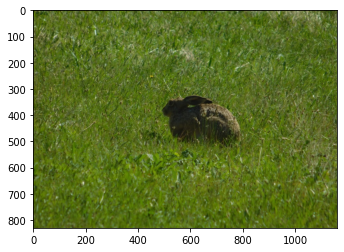

In [5]:
hare = cv2.imread('Zajac_kolor.jpg')[..., ::-1]
plt.imshow(hare);

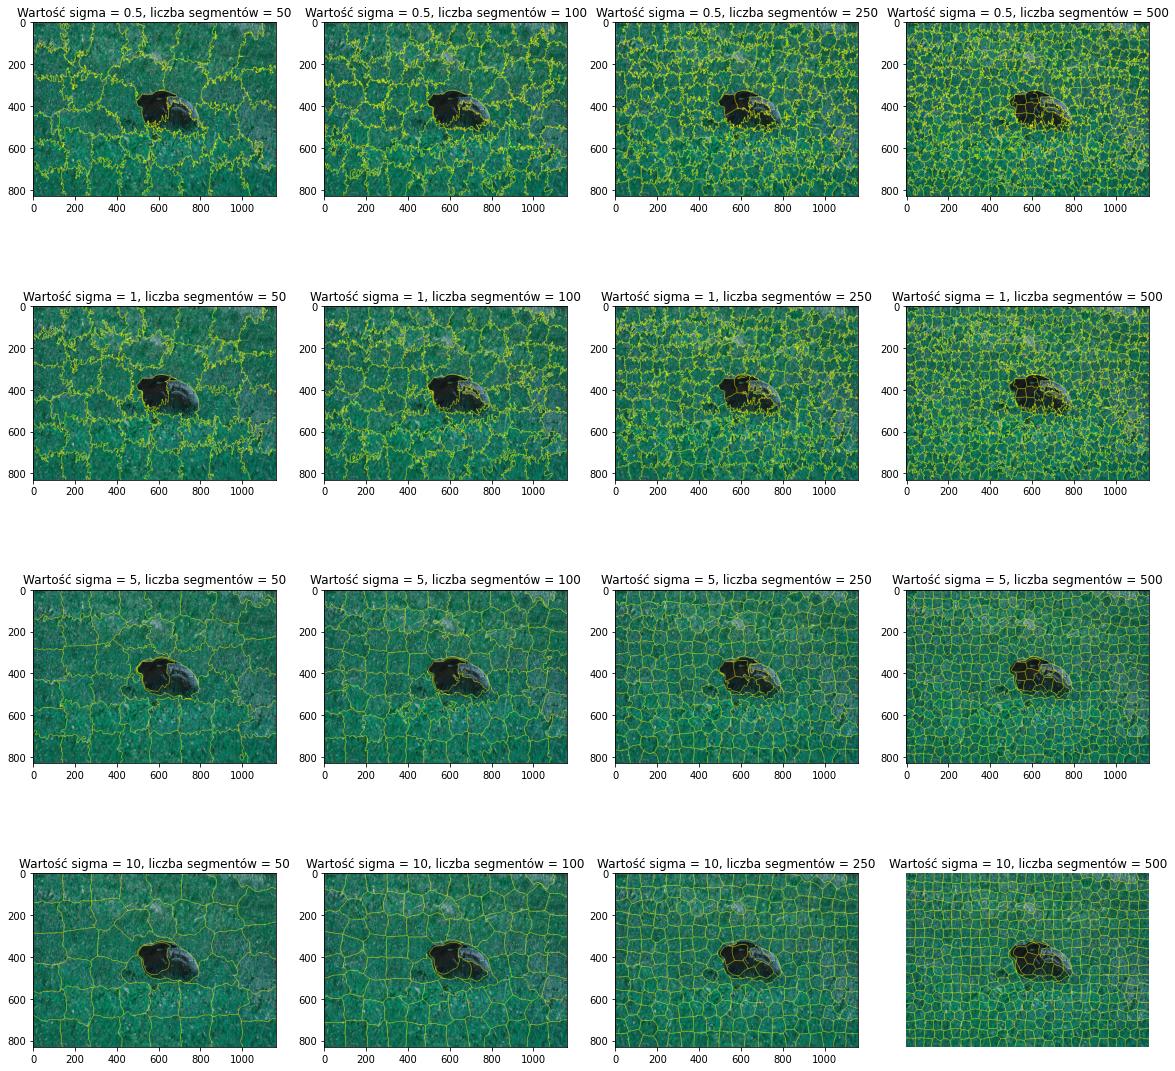

In [6]:
from skimage.util import img_as_float

f, ((a1, a2, a3, a4), (a5, a6, a7, a8), (a9, a10, a11, a12), (a13, a14, a15, a16)) = plt.subplots(4, 4)
f.set_figwidth(20)
f.set_figheight(20)
axs = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16]
sigma = [0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10]
segments = [50, 100, 250, 500, 50, 100, 250, 500, 50, 100, 250, 500, 50, 100, 250, 500,]

hare_RGB = cv2.cvtColor(hare, cv2.COLOR_BGR2RGB)
image = img_as_float(hare_RGB)

for ax, n_sigma, n_segments in zip(axs, sigma, segments):
    segments = slic(image, n_segments=n_segments, sigma=n_sigma, start_label=1)
    img_tmp = mark_boundaries(image, segments)
    ax.imshow(img_tmp) 
    plt.axis("off")
    ax.set_title('Wartość sigma = {}, liczba segmentów = {}'.format(n_sigma, n_segments))

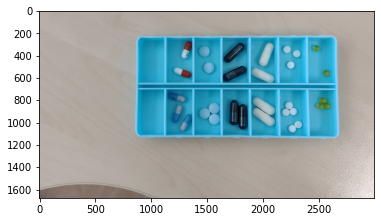

In [7]:
pills = cv2.imread('pills.png')[..., ::-1]
plt.imshow(pills);

# Spytaj na zajęciach czy jest wymagana konwersja na float 

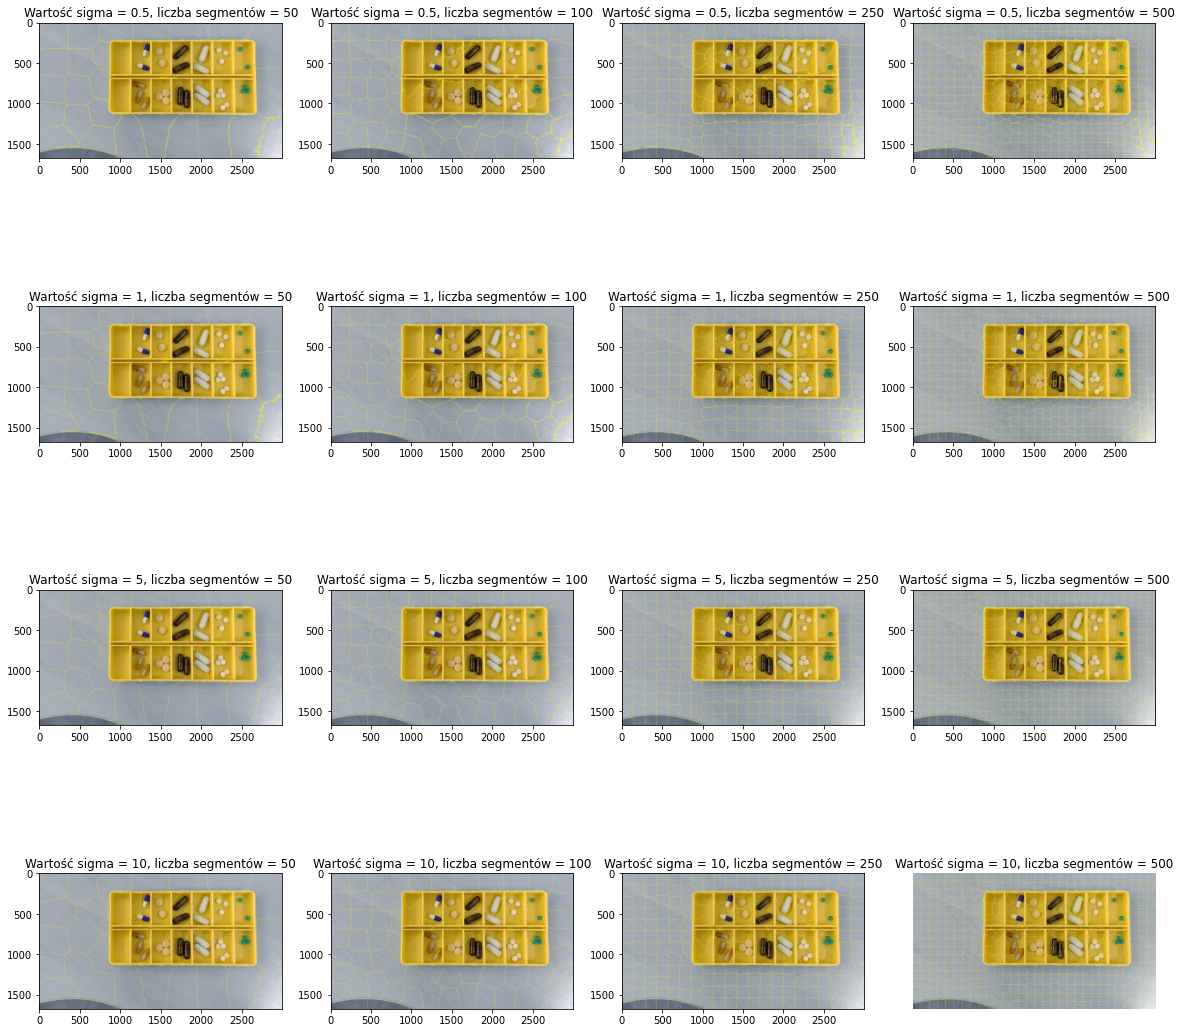

In [8]:
from skimage.util import img_as_float

f, ((a1, a2, a3, a4), (a5, a6, a7, a8), (a9, a10, a11, a12), (a13, a14, a15, a16)) = plt.subplots(4, 4)
f.set_figwidth(20)
f.set_figheight(20)
axs = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16]
sigma = [0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10]
segments = [50, 100, 250, 500, 50, 100, 250, 500, 50, 100, 250, 500, 50, 100, 250, 500,]

# pills_RGB = cv2.cvtColor(pills, cv2.COLOR_BGR2RGB)
pills_RGB= cv2.cvtColor(pills, cv2.COLOR_BGR2RGB)
image = img_as_float(pills_RGB)

for ax, n_sigma, n_segments in zip(axs, sigma, segments):
    segments = slic(image, n_segments=n_segments, sigma=n_sigma, start_label=1)
    img_tmp = mark_boundaries(image, segments)
    ax.imshow(img_tmp) 
    plt.axis("off")
    ax.set_title('Wartość sigma = {}, liczba segmentów = {}'.format(n_sigma, n_segments))

#### Zadanie 2

Dla obrazu `hare` wykonaj post-processing segmentacji SLIC by uzyskać dwa jednorodne obszary: jeden zawierający wyłącznie zająca, drugi zawierający wyłącznie trawę. Wykorzystaj dowolny algorytm klasteryzacji (np. `cv2.kmeans`) używając *cech* superpikseli uzyskanych w zadaniu 1 jako danych wejściowych. Najprostszymi cechami, którymi można opisać superpiksele, są np. średnie wartości składowych barwy (pikseli, z których składa się superpiksel) - od nich zacznij. Zawsze możesz rozszerzyć rozwiązanie o bardziej wyrafinowane pomysły, jeśli starczy czasu.

Zaprezentuj wyniki najlepiej za pomocą `mark_boundaries` albo po prostu wyświetlając maskę binarną.

---

NumPy pro-tip: aby uzyskać zbiór wszystkich pikseli obrazu o wartości np. 3 możesz użyć notacji: ```obraz==3```. Wynikiem jest macierz boolowska, której można używać jako selektor. Np. aby na obrazie `A` wyzerować wszystkie piksele, którym w obrazie `B` odpowiada wartość 5, możesz napisać: ```A[B==5] = 0```. Ten zapis jest **znacznie** szybszy niż manualne iterowanie po obrazach i sprawdzanie warunków if-ami.

Przykładowe użycie `cv2.kmeans` (więcej możesz poczytać np. [tutaj](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)):
```python
c, labels, centers = cv2.kmeans(
    data=data,  # np.ndarray typu float o wymiarach NxK gdzie N to liczba sampli (u nas: superpikseli), K - liczba cech
    K=2,        # oczekiwana liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS, 10, 1.0),  # przykładowe kryteria stopu
    attempts=1, # liczba powtórzeń algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS  # sposób inicjalizacji klastrów
)
```

Funkcja ta zwraca krotkę, której najważniejszym komponentem jest ten drugi (tu: `labels`), tj. macierz o wymiarach Nx1, zawierająca indeks klastra przypisanego i-temu samplowi.

[[[ 77  97  34]
  [ 71  92  25]
  [ 72  94  19]
  ...
  [109 122  68]
  [ 89 107  49]
  [ 57  77  18]]

 [[ 74  99  34]
  [ 61  84  16]
  [ 72  94  21]
  ...
  [108 119  63]
  [ 89 104  45]
  [ 51  69   9]]

 [[ 62  89  22]
  [ 54  84  14]
  [ 57  91  14]
  ...
  [101 112  52]
  [ 82  96  35]
  [ 62  78  16]]

 ...

 [[ 76  95  14]
  [ 74  92  16]
  [ 72  92  20]
  ...
  [ 84  97  15]
  [ 83  98  17]
  [ 81  98  18]]

 [[ 76  93  13]
  [ 75  93  17]
  [ 75  93  19]
  ...
  [ 83  96  14]
  [ 82  97  16]
  [ 81  99  17]]

 [[ 78  95  15]
  [ 76  93  15]
  [ 76  94  18]
  ...
  [ 82  97  12]
  [ 82  97  16]
  [ 80  98  16]]]


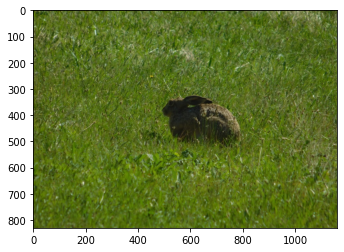

In [13]:
# zacznij od przygotowania macierzy wejściowej (data) reprezentującej superpiksele jako punkty danych
hare = cv2.imread('Zajac_kolor.jpg')[..., ::-1]
plt.imshow(hare);
print(hare)

In [14]:
hare_RGB = cv2.cvtColor(hare, cv2.COLOR_BGR2RGB)
image = img_as_float(hare_RGB)
n_segments = 100
sigma = 0.5
segments= slic(image, n_segments=n_segments, sigma=sigma, start_label=1)

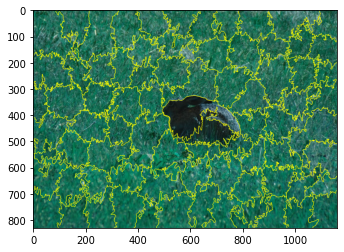

In [15]:
img_tmp = mark_boundaries(image, segments)
plt.imshow(img_tmp) 

In [16]:
data = []
for i in np.unique(segments):
    data.append(np.mean(image[segments == i ], axis = 0))
print(data)

[array([0.15405421, 0.43160771, 0.3582408 ]), array([0.13869134, 0.42621995, 0.35130145]), array([0.14998888, 0.44709762, 0.3564345 ]), array([0.15690517, 0.45574915, 0.36228886]), array([0.18669243, 0.45559757, 0.3758317 ]), array([0.13874085, 0.42331958, 0.33551398]), array([0.12645803, 0.41550718, 0.31680529]), array([0.15509721, 0.44743968, 0.35081868]), array([0.14374381, 0.43500297, 0.3446096 ]), array([0.21797074, 0.46090408, 0.40058192]), array([0.15535217, 0.41481688, 0.34130542]), array([0.178587  , 0.47377793, 0.37533417]), array([0.09936449, 0.37919012, 0.29013078]), array([0.15351917, 0.44962032, 0.34966781]), array([0.14785426, 0.41183283, 0.32308094]), array([0.11253597, 0.38790651, 0.304935  ]), array([0.19661536, 0.48482276, 0.39603351]), array([0.17706793, 0.47290457, 0.3744066 ]), array([0.13473034, 0.44807111, 0.35330276]), array([0.1288543 , 0.41106986, 0.34354022]), array([0.1045989 , 0.39037699, 0.30446187]), array([0.15557965, 0.43611267, 0.35925889]), array([0.

In [18]:
import numpy as np
data = img_as_float(data)
data = data.astype(np.float32)
print(data.dtype)
c, labels, centers = cv2.kmeans(
    data=data,  # np.ndarray typu float o wymiarach NxK gdzie N to liczba sampli (u nas: superpikseli), K - liczba cech
    K=2,        # oczekiwana liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS, 10, 1.0),  # przykładowe kryteria stopu
    attempts=1, # liczba powtórzeń algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS  # sposób inicjalizacji klastrów
)

float32


Możesz wykorzystać poniższy snippet by zredukować wynik segmentacji SLIC (`segments`) w oparciu o klasteryzację k-średnich (`labels`):

In [19]:
postprocessed = np.zeros_like(segments)
for i in range(labels.shape[0]):
    # postprocessed[segments==i] = labels[i] # jeśli używamy indeksowania od 0 w SLIC
    postprocessed[segments==i+1] = labels[i] # jeśli używamy indeksowania od 1

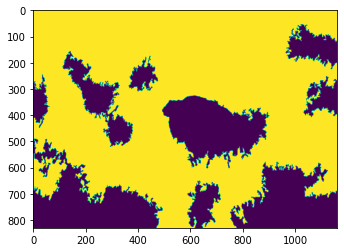

In [20]:
plt.imshow(postprocessed)
